In [43]:
# package
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [44]:
def resize_with_padding(image, target_size):
    height, width = image.shape[:2] # (360, 616, 3) -> (360, 616)
    
    aspect_ratio = width / height
    
    if width > height:
        new_width = target_size
        new_height = int(target_size / aspect_ratio)
    else:
        new_height = target_size
        new_width = int(target_size * aspect_ratio)
    
    resized_image = cv2.resize(image, (new_width, new_height))
    
    # Create a black background with target_size dimensions
    black_background = np.zeros((target_size, target_size, 3), dtype=np.uint8)
    
    # Place the resized image on the black background
    x_offset = (target_size - new_width) // 2
    y_offset = (target_size - new_height) // 2
    black_background[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = resized_image
    
    return black_background

In [45]:
# Load the image
image_path = 'images/image1.jpg'
image = cv2.imread(image_path)

In [46]:
height, width, channels = image.shape

# Print the dimensions
print(f"Width: {width}")
print(f"Height: {height}")
print(f"Channels: {channels}")
print(f"image.shape: {image.shape}")

Width: 616
Height: 360
Channels: 3
image.shape: (360, 616, 3)


In [47]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Canny Edge Detection
edges = cv2.Canny(thresh, threshold1=30, threshold2=100)


In [48]:
# Apply morphological operations to close gaps
kernel = np.ones((5, 5), np.uint8)
dilated_edges = cv2.dilate(edges, kernel, iterations=1)
eroded_edges = cv2.erode(dilated_edges, kernel, iterations=1)

In [49]:
# Find contours from the edge map
contours, _ = cv2.findContours(eroded_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [50]:
# Calculate contour areas and sort by area
contour_areas = [(cv2.contourArea(cnt), cnt) for cnt in contours]
contour_areas.sort(reverse=True, key=lambda x: x[0])
# Create a copy of the original image to draw contours
contour_image = image.copy()

In [51]:
top_contours = [cnt for area, cnt in contour_areas[:10]]

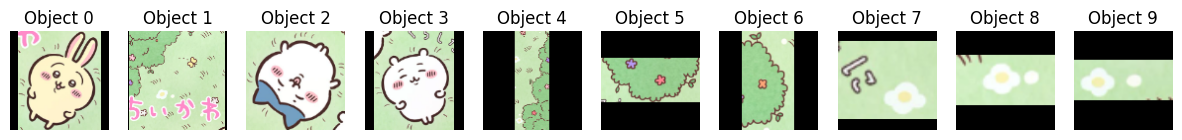

In [52]:
target_size = 100 # pixel of new image
resized_objects = []
for idx, contour in enumerate(top_contours):
    # Get the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Extract the object using the bounding rectangle
    object_img = image[y:y+h, x:x+w]
    
    # Resize the object with padding
    padded_img = resize_with_padding(object_img, target_size)
    
    # Store the resized object for displaying
    resized_objects.append(padded_img)

# Display the resized objects
plt.figure(figsize=(15, 5))
for idx, padded_img in enumerate(resized_objects):
    plt.subplot(1, len(resized_objects), idx + 1)
    plt.title(f'Object {idx}')
    plt.imshow(cv2.cvtColor(padded_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

### After we found the objects, we can rename the objects and classify them in GUI